In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyxdf

%matplotlib inline

In [2]:
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test_run-001_eeg.xdf'
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test_run-002_eeg.xdf'
fpath = './results/sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-test-120_run-003_eeg.xdf'
fpath = "D:\Documents\CurrentStudy\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-Default_run-001_eeg.xdf"
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test-120_run-001_eeg.xdf'
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test-120_run-004_eeg.xdf'
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test-120_run-007_eeg.xdf'
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test-120-nogc_run-001_eeg.xdf'
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test-120_run-008_eeg.xdf'

fpath = "D:\Documents\CurrentStudy\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-Default_run-001_eeg.xdf"
streams, header = pyxdf.load_xdf(fpath, dejitter_timestamps=False)

for stream in streams:
    print(stream['info']['name'])

['ScreenSensorStream']
['ScreenSequenceStream']


In [3]:
# # Get sequence stream by name
# sequence_stream = [s for s in streams if s['info']['name'][0] == 'SequenceStream'][0]
# screen_sequence_stream = [s for s in streams if s['info']['name'][0] == 'ScreenSequenceStream'][0]
# sensor_stream = [s for s in streams if s['info']['name'][0] == 'ScreenSensorStream'][0]
# phase_stream = [s for s in streams if s['info']['name'][0] == 'PhaseMarkers'][0]

sequence_stream = [s for s in streams if s['info']['name'][0] == 'ScreenSequenceStream'][0]
sensor_stream = [s for s in streams if s['info']['name'][0] == 'ScreenSensorStream'][0]

## Sequence jitter

[3836.23414135] [3838.74741136]
[0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0]


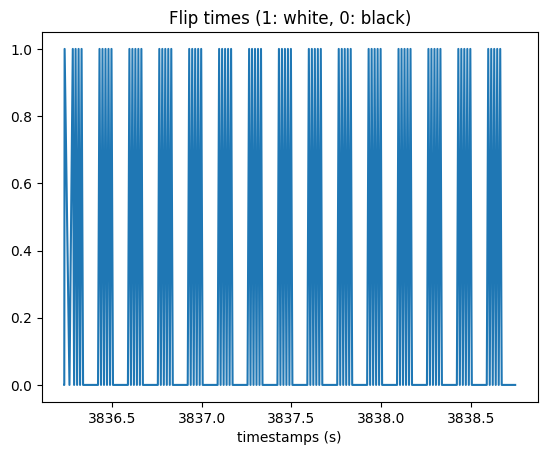

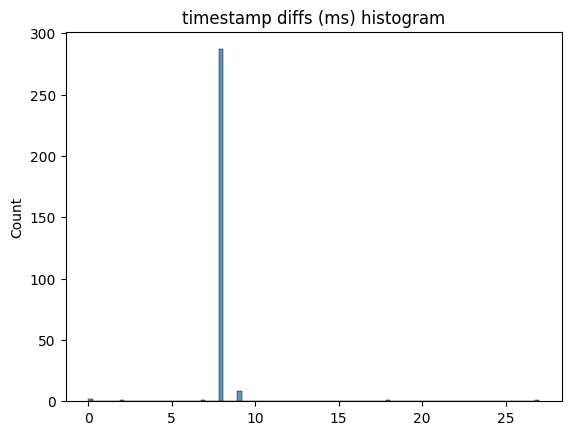

(array([ 0.,  2.,  7.,  8.,  9., 18., 27.]), array([  2,   1,   1, 287,   8,   1,   1], dtype=int64))


In [4]:
%matplotlib inline
timestamps = sequence_stream['time_stamps']
timeseries = sequence_stream['time_series']
timeseries = np.array(timeseries).ravel()

start_time = timestamps[timeseries == 'Start']
stop_time = timestamps[timeseries == 'Stop']
print(start_time, stop_time)
timeseries = timeseries[(timestamps >= start_time) & (timestamps <= stop_time)]
timestamps = timestamps[(timestamps >= start_time) & (timestamps <= stop_time)]
timeseries = timeseries == '1'
timeseries = timeseries.astype(int)
print(timeseries)

# Start from second pause
timestamps_diff = np.diff(timestamps)

plt.title('Flip times (1: white, 0: black)')
plt.plot(timestamps, timeseries)
plt.xlabel('timestamps (s)')
plt.show()

timestamps_diff = np.diff(timestamps)
timestamps_diff_ms = timestamps_diff * 1000
timestamps_diff_ms_round = timestamps_diff_ms.round()
timestamps_diff_ms_round = timestamps_diff_ms_round[timestamps_diff_ms_round < 400]
plt.title('timestamp diffs (ms) histogram')
sns.histplot(x=timestamps_diff_ms_round, bins=100)
plt.show()

print(np.unique(timestamps_diff_ms_round, return_counts=True))




# Sensor jitter

In [5]:
timestamps_sensor = sensor_stream['time_stamps']
timeseries_sensor = sensor_stream['time_series']
# # Get timestamps_sensor within sequence stream time range
timeseries_sensor = timeseries_sensor[timestamps_sensor >= start_time]
timestamps_sensor = timestamps_sensor[timestamps_sensor >= start_time]

timeseries_sensor = timeseries_sensor[timestamps_sensor <= stop_time]
timestamps_sensor = timestamps_sensor[timestamps_sensor <= stop_time]

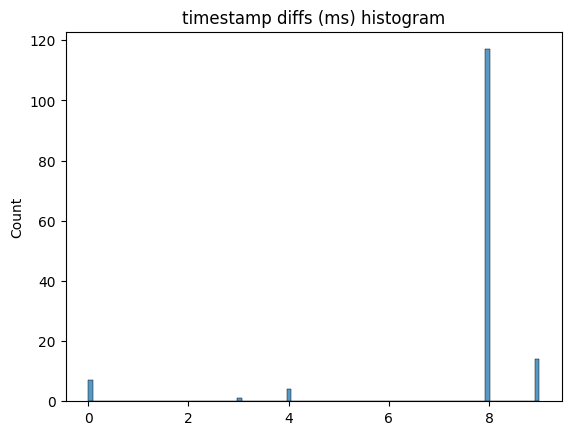

(array([0., 3., 4., 8., 9.]), array([  7,   1,   4, 117,  14], dtype=int64))


In [6]:
timestamps_diff = np.diff(timestamps_sensor)
timestamps_diff_ms = timestamps_diff * 1000
timestamps_diff_ms_round = timestamps_diff_ms.round()
timestamps_diff_ms_round = timestamps_diff_ms_round[timestamps_diff_ms_round < 40]
plt.title('timestamp diffs (ms) histogram')
sns.histplot(x=timestamps_diff_ms_round, bins=100)
plt.show()

print(np.unique(timestamps_diff_ms_round, return_counts=True))

In [7]:
%matplotlib qt
plt.plot(timestamps, timeseries, label='lsl')
plt.plot(timestamps_sensor, timeseries_sensor, label='sensor')
# plt.plot(timestamps_flip, timeseries_flip, label='flip')
plt.legend()
plt.show()

In [8]:
start = 3836.388
timeseries = timeseries[timestamps >= start]
timestamps = timestamps[timestamps >= start]

In [9]:
timeseries_sensor = timeseries_sensor[timestamps_sensor >= start]
timestamps_sensor = timestamps_sensor[timestamps_sensor >= start]

In [10]:
timeseries_sensor.ravel()

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0], dtype=int8)

(70,) (70,)
(70,) (70,)


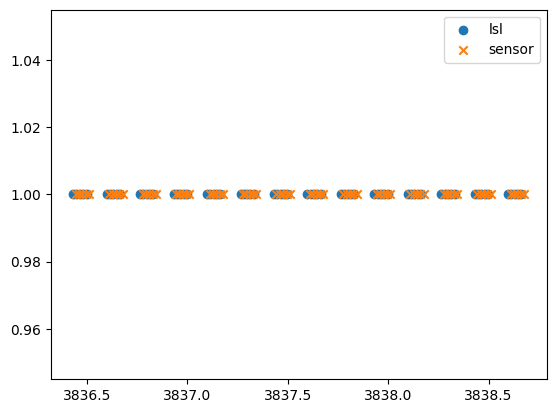

In [12]:
print(timestamps.shape, timestamps_sensor.shape)
timestamps = timestamps[timeseries == 1]
timeseries = timeseries[timeseries == 1]
timestamps_sensor = timestamps_sensor[timeseries_sensor.ravel() == 1]
timeseries_sensor = timeseries_sensor[timeseries_sensor.ravel() == 1]
print(timestamps.shape, timestamps_sensor.shape)

%matplotlib inline
plt.scatter(timestamps, timeseries, label='lsl')
plt.scatter(timestamps_sensor, timeseries_sensor, label='sensor', marker='x')
# plt.plot(timestamps_flip, timeseries_flip, label='flip')
plt.legend()
plt.show()

In [13]:
timestamps_diff = timestamps_sensor - timestamps
print(timestamps_diff.shape)
timestamps_diff_ms = timestamps_diff * 1000
print(timestamps_diff_ms.shape)

(70,)
(70,)


In [14]:
timestamps.shape

(70,)

In [15]:
timestamps_diff_ms.shape

(70,)

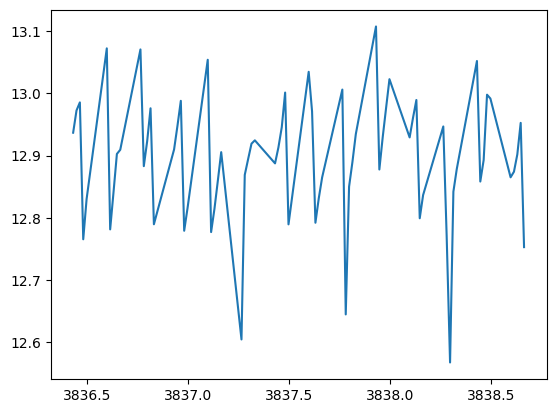

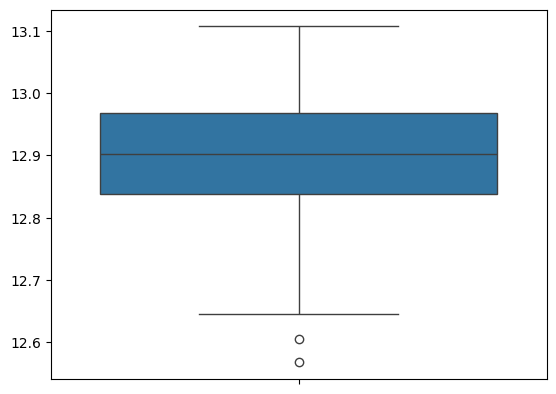

12.894658045089662
0.10261881798888364


In [16]:
%matplotlib inline
plt.plot(timestamps, timestamps_diff_ms)
plt.show()

sns.boxplot(timestamps_diff_ms)
plt.show()
print(timestamps_diff_ms.mean())
print(timestamps_diff_ms.std())